<a href="https://colab.research.google.com/github/MehrdadDastouri/object_detection_faster_rcnn/blob/main/object_detection_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu


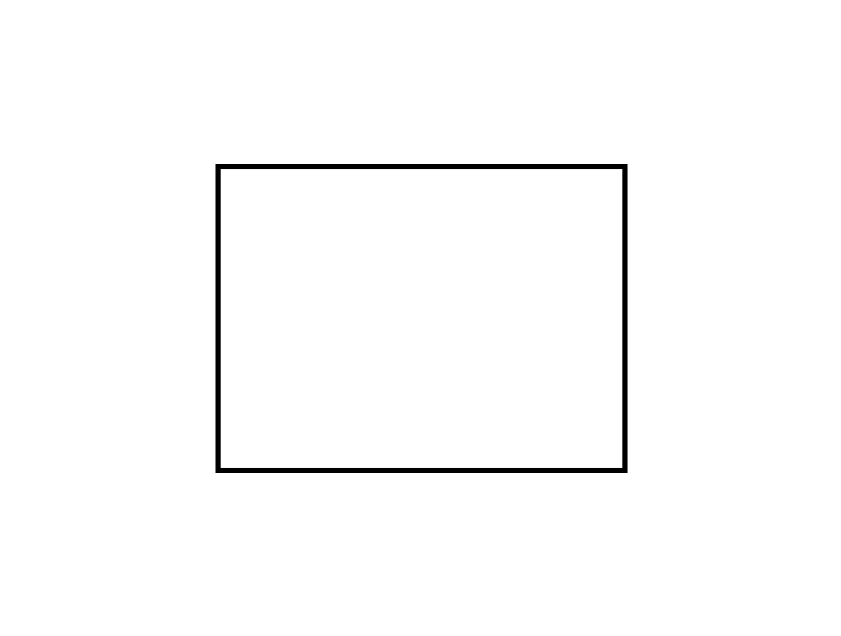

In [6]:
# Import necessary libraries
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
model = model.to(device)
model.eval()

# Create a sample image (a blank white image with a black rectangle)
width, height = 800, 600
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)
draw.rectangle([200, 150, 600, 450], outline="black", width=5)  # Draw a rectangle

# Save the generated image locally (optional)
image.save("generated_sample_image.jpg")

# Preprocess the image
image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predictions
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Filter predictions by confidence score
threshold = 0.5
filtered_boxes = boxes[scores > threshold]
filtered_labels = labels[scores > threshold]
filtered_scores = scores[scores > threshold]

# Load COCO labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop',
    'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

# Visualize the detections
def visualize_detections(image, boxes, labels, scores):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box, label, score in zip(boxes, labels, scores):
        x_min, y_min, x_max, y_max = box
        width, height = x_max - x_min, y_max - y_min

        # Draw the bounding box
        ax.add_patch(plt.Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none', linewidth=2))

        # Add label and score
        label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
        ax.text(x_min, y_min, label_text, fontsize=10, color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis("off")
    plt.show()

# Convert the image back to NumPy format for visualization
image_np = np.array(image)

# Visualize the filtered detections
visualize_detections(image_np, filtered_boxes, filtered_labels, filtered_scores)